<a href="https://colab.research.google.com/github/yadhavkrishnasb/AI-for-Cybersecurity-Threat-and-Fraud-Detection/blob/main/Credit%20Card%20Fraud%20Detection%20Dataset%20%E2%80%93%20Transaction-level%20fraud%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✔ Dataset Loaded Successfully!

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         

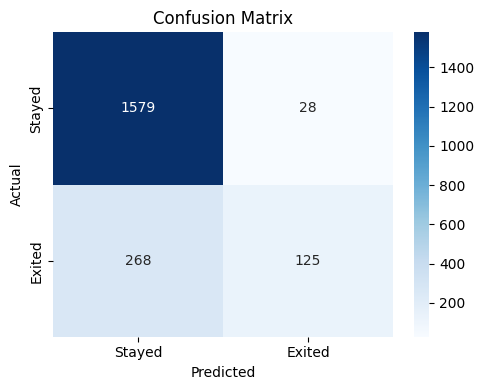

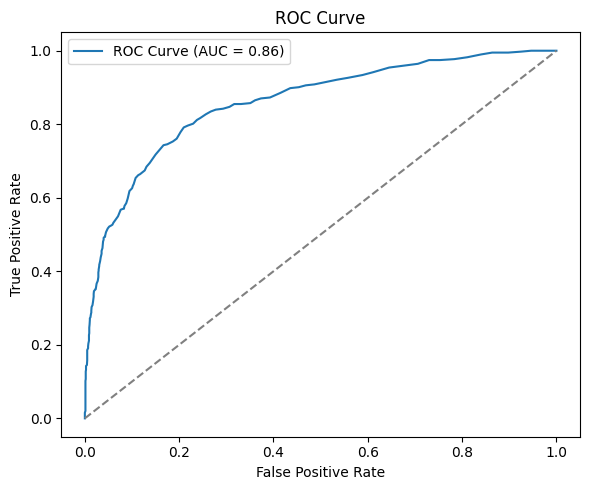

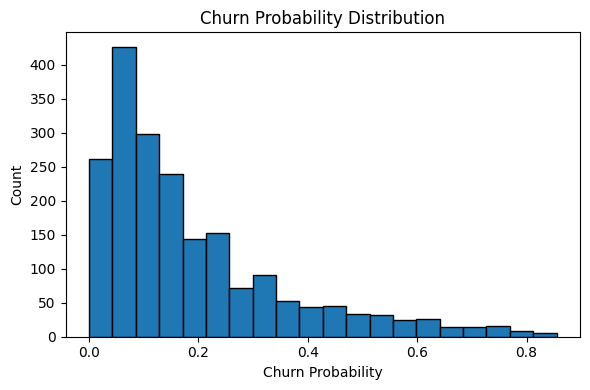


=== SAMPLE PREDICTION ===
      RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
3092       3093    15689751   Jones          666    France  Female   31   

      Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3092       2  79589.43              1          0               0   

      EstimatedSalary  
3092          4050.57  

Churn Prediction : 0
Churn Probability: 0.045


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())


X = df.drop("Exited", axis=1)
y = df["Exited"]


numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("\nNumeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))


preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n============= MODEL PERFORMANCE ===========")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("==============================================\n")




cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Stayed", "Exited"],
            yticklabels=["Stayed", "Exited"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



sample = X.sample(1)

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print(sample)
print("\nChurn Prediction :", pred)
print("Churn Probability:", prob)